<a href="https://colab.research.google.com/github/KINGSANGWOON/school/blob/main/3_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import fetch_openml

import numpy as np

import pandas as pd

In [9]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [12]:

np.shape(mnist.data)

mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [13]:


print(mnist.feature_names) 
print(np.unique(mnist.target))  # 중복 없이 어떤 데이터가 있는지 보여준다

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [14]:
import matplotlib.pyplot as plt


<function matplotlib.pyplot.show>

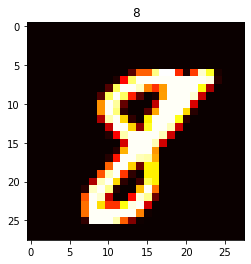

In [16]:
n = 55

image = mnist.data[n].reshape(28,28)
plt.imshow(image,cmap='hot')
plt.title(mnist.target[n])
plt.show


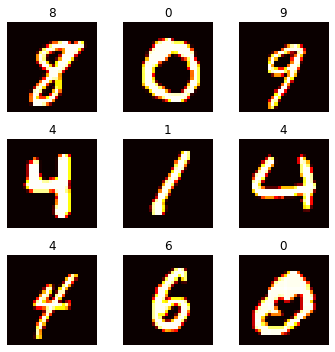

In [17]:
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(mnist.data[n+i].reshape(28,28),'hot')
  plt.title(mnist.target[n+i])
  plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data,mnist.target,test_size = 0.3,stratify =  mnist.target)

In [22]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(49000, 784) (21000, 784) (49000,) (21000,)


In [23]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(200,50),
                      activation='relu',
                      solver='adam',
                      max_iter=10,
                      verbose=1)

In [26]:
model.fit(X_train,y_train)

Iteration 1, loss = 2.45775059
Iteration 2, loss = 0.51431390
Iteration 3, loss = 0.32883834
Iteration 4, loss = 0.25143326
Iteration 5, loss = 0.19481977
Iteration 6, loss = 0.17073253
Iteration 7, loss = 0.14962192
Iteration 8, loss = 0.13338124
Iteration 9, loss = 0.11535617
Iteration 10, loss = 0.10408885


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(200, 50), max_iter=10, verbose=1)

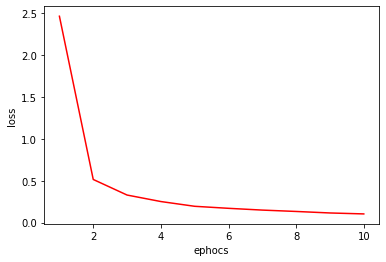

In [29]:
loss_values = model.loss_curve_
line_x = np.arange(1,len(loss_values)+1)
plt.plot(line_x,loss_values,'r')
plt.xlabel('ephocs')
plt.ylabel('loss')
plt.show()

In [30]:
print("Test set Score:",model.score(X_test,y_test))

Test set Score: 0.9476666666666667
